# Plot velocities 

- plot release zone around tenerife; with 500m/1000m cell depth as outer boundary criteria
- compare area to old release zone?
- same for target zones along african coast;

In [1]:
import pandas as pd
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.vector_transform import vector_scalar_to_grid
from datetime import datetime, timedelta
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import xarray as xr
import cmocean
import matplotlib.patches as patches
plt.rcParams['font.size'] = 14


# currents and quivers


In [2]:
#slicing and mean
#get data dez 2011
# location of input data
data_path = Path("/gxfs_work1/geomar/smomw355/model_data/ocean-only/VIKING20X.L46-KFS003/nemo/output/")
u_file = "1_VIKING20X.L46-KFS003_1d_20110101_20111231_grid_U.nc"#1/5° without "1_" prefix
v_file = "1_VIKING20X.L46-KFS003_1d_20110101_20111231_grid_V.nc"
t_file = "1_VIKING20X.L46-KFS003_1d_20110101_20111231_grid_T.nc"

t = xr.open_dataset(data_path / t_file)
u = xr.open_dataset(data_path / u_file)
v = xr.open_dataset(data_path / v_file)
#v
#file sizes for one year:
# UV 1m - 13+13 GB
# T 1m - 29 GB
# UV 1d - 146+146 GB
# T 1d - 220 GB
depths_levels = [ 3.046773,   9.454049,  16.363966,  23.89871 ,  32.20929 ,  41.481853,
        51.94513 ,  63.87905 ,  77.62451 ,  93.594124, 112.283485]
t_lat = t.coords["nav_lat"].values[1:,0]
t_lon = t.coords["nav_lon"].values[0,:]

v_lat = v.coords["nav_lat"].values[1:,0]
u_lon = u.coords["nav_lon"].values[0,:]


#select t array for plots
lat_b = (20,30)
lon_b = (-20,-10)

yt_ind = np.where((t_lat <= lat_b[1]) & (t_lat>= lat_b[0]))[0]  
xt_ind = np.where((t_lon <= lon_b[1]) & (t_lon >= lon_b[0]))[0]

t_sel = t.vosaline[:,:,yt_ind,xt_ind].sel( # 5 oberste schichten
    time_counter = "2011-01-01") # 1 month december
del t,u,v

In [3]:

#lat_b = (27.75,28.85)
lon_b = (-15.95,-17.05)
lat_b = (27.8,28.9)#for shifted lats (possible particles on land(north coast)?

#ext_500 = []

from shapely.geometry import Polygon, Point
#from shapely.plotting import plot_line, plot_points
delta_box = 0.8

b_lats = v_lat[np.where((v_lat <lat_b[1]) &(v_lat >lat_b[0]))[0]]
b_lons = u_lon[np.where((u_lon <=lon_b[0]) &(u_lon >=lon_b[1]))[0]]

#ax1.set_extent([-17, -15.9, 27.8, 28.8])
print('coords of cell boundaries around release box:')
print(b_lats)
print(b_lons)


coords of cell boundaries around release box:
[27.800423 27.84364  27.88683  27.929993 27.973125 28.01623  28.059305
 28.10235  28.145369 28.188358 28.231318 28.274248 28.31715  28.360023
 28.402866 28.44568  28.488466 28.531221 28.573948 28.616646 28.659313
 28.70195  28.744558 28.787138 28.829685 28.872206]
[-17.025 -16.975 -16.925 -16.875 -16.825 -16.775 -16.725 -16.675 -16.625
 -16.575 -16.525 -16.475 -16.425 -16.375 -16.325 -16.275 -16.225 -16.175
 -16.125 -16.075 -16.025 -15.975]


In [4]:
# new_blats
lat_b = (27.81,28.85)
b_lats = v_lat[np.where((v_lat <lat_b[1]) &(v_lat >lat_b[0]))[0]]
print(b_lats)

[27.84364  27.88683  27.929993 27.973125 28.01623  28.059305 28.10235
 28.145369 28.188358 28.231318 28.274248 28.31715  28.360023 28.402866
 28.44568  28.488466 28.531221 28.573948 28.616646 28.659313 28.70195
 28.744558 28.787138 28.829685]


In [5]:

#load polygon data (old data)
interior = [(b_lons[3],b_lats[13]), (b_lons[9],b_lats[13]), (b_lons[12],b_lats[16]), 
            (b_lons[13],b_lats[16]), (b_lons[14],b_lats[17]), (b_lons[18],b_lats[17]),(b_lons[18],b_lats[16]),
            (b_lons[17],b_lats[16]), (b_lons[13],b_lats[12]),
            (b_lons[13],b_lats[10]), (b_lons[12],b_lats[9]),  (b_lons[12],b_lats[8]),
            (b_lons[10],b_lats[6]), (b_lons[10],b_lats[5]),
            (b_lons[7],b_lats[5]), (b_lons[5],b_lats[7]),  (b_lons[5],b_lats[8]),  (b_lons[4],b_lats[9]), (b_lons[4],b_lats[10]),     
            (b_lons[3],b_lats[11]),  
            (b_lons[3],b_lats[13])]
#create inuform particle disstr in polygon (from northsea oysters?)
#delta_box = 0.8
box_ext = [(-17,27.75),(-17,28.75),
            (-16,28.75),(-16,27.75),
            (-17,27.75)] #end with starting point
ext_1000 = [(b_lons[0],b_lats[13]),(b_lons[2],b_lats[15]), (b_lons[6],b_lats[15]),(b_lons[7],b_lats[16]),    
            (b_lons[11],b_lats[16]), (b_lons[11],b_lats[18]), (b_lons[12],b_lats[19]), (b_lons[13],b_lats[19]), (b_lons[14],b_lats[20]),(b_lons[19],b_lats[20]),
            (b_lons[19],b_lats[19]), (b_lons[20],b_lats[18]), (b_lons[20],b_lats[17]), (b_lons[19],b_lats[16]), (b_lons[19],b_lats[14]), (b_lons[15],b_lats[10]),(b_lons[15],b_lats[9]), 
            (b_lons[14],b_lats[8]), (b_lons[14],b_lats[7]), (b_lons[10],b_lats[3]), (b_lons[6],b_lats[3]), (b_lons[4],b_lats[5]), (b_lons[4],b_lats[6]), (b_lons[3],b_lats[7]),
            (b_lons[3],b_lats[8]),(b_lons[1],b_lats[10]),(b_lons[1],b_lats[11]),   
           (b_lons[0],b_lats[12]),(b_lons[0],b_lats[13])]#<1000m boundary here

ext_500 = [(b_lons[1],b_lats[13]),(b_lons[2],b_lats[14]), (b_lons[6],b_lats[14]),(b_lons[7],b_lats[15]), (b_lons[9],b_lats[15]), (b_lons[13],b_lats[19]),
           (b_lons[16],b_lats[19]), (b_lons[17],b_lats[20]),(b_lons[18],b_lats[20]), (b_lons[19],b_lats[19]), (b_lons[19],b_lats[15]), (b_lons[15],b_lats[11]),       
            (b_lons[15],b_lats[10]), (b_lons[14],b_lats[9]),(b_lons[14],b_lats[8]), (b_lons[12],b_lats[6]), (b_lons[12],b_lats[5]), (b_lons[11],b_lats[5]), (b_lons[10],b_lats[4]),
           (b_lons[9],b_lats[4]),(b_lons[8],b_lats[3]), (b_lons[7],b_lats[3]),(b_lons[6],b_lats[4]), (b_lons[5],b_lats[4]), (b_lons[5],b_lats[4]), (b_lons[5],b_lats[5]), (b_lons[4],b_lats[6]),
           (b_lons[4],b_lats[7]), (b_lons[3],b_lats[8]), (b_lons[3],b_lats[9]),
           (b_lons[1],b_lats[11]), (b_lons[1],b_lats[13])]#<1000m boundary here

box_poly500 = Polygon(ext_500, [interior])
box_poly = Polygon(ext_1000, [interior])
old_box = Polygon(box_ext, [interior])
#print(box_poly1000.area)
#print(box_poly500.area)

#box_poly

In [4]:
cell_shift = np.ediff1d(t_lon[xt_ind])[0] / 2  #shift from cell center to cell edges

# load GSHHS Feature
land = cartopy.feature.GSHHSFeature( edgecolor='00', facecolor= None)

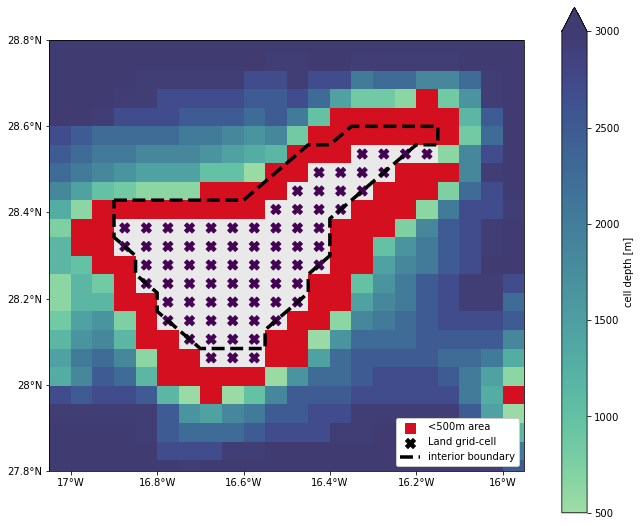

In [31]:
layer_ind = 0

depth_ind = t_sel.where(t_sel == 0).fillna(1).sum(dim = "deptht").astype('int')
depth_tgrid =  t_sel.deptht.isel(deptht = depth_ind)
mesh_t_lon, mesh_t_lat = np.meshgrid(t_lon[xt_ind] - cell_shift,t_lat[yt_ind] + cell_shift)


x_lines = np.arange(-17,-15.8,.2).tolist()
y_lines = np.arange(27.8,30,.2).tolist()
proj = cartopy.crs.PlateCarree()
cb_pad = 0.07
cb_fraction = 0.047
t = mpl.markers.MarkerStyle(marker='d')
t._transform = t.get_transform().rotate_deg(90)


new_cmap = cmocean.tools.crop_by_percent(cmocean.cm.deep, 35, which='both', N=None)
color2 = colors.LinearSegmentedColormap.from_list('cmap2', plt.cm.YlOrRd(np.ones(2)*.8))
color3 = colors.LinearSegmentedColormap.from_list('cmap2', plt.cm.autumn(np.ones(2)*.7))

fig, ax1 = plt.subplots(1, 1, subplot_kw={"projection": proj}, figsize=(9, 10))

ax1.set_extent([-17.05, -15.95, 27.7, 28.8])
pcol = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.squeeze(), cmap = new_cmap, vmin = 500,vmax = 3000,rasterized = True)
#pcol1 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <1000)[0], cmap =color3, vmin = 500,vmax = 1000)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <500)[0], cmap =color2, vmin = 1,vmax = 500,rasterized = True)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <10)[0], cmap ='binary', vmin = 0,vmax = 35,rasterized = True)
ax1.scatter(mesh_t_lon, mesh_t_lat, c = t_sel[0,layer_ind,:].where(t_sel[0,layer_ind,:] == 0),marker = 'X',s = 100,rasterized = True)
#ax1.coastlines(linewidth = 2, rasterized = True)
#ax1.add_feature(land,zorder = 2)

#for legend
#ax1.scatter(0,0, s = 100, color = plt.cm.autumn(.7),marker = 's', label = '<1000m area')
ax1.scatter(0,0, s = 100, color = plt.cm.YlOrRd(.8),marker = 's', label = '<500m area',rasterized = True)
ax1.scatter(0,0, s = 100, c = '00',marker = 'X', label = 'Land grid-cell',rasterized = True)
#ax1.plot([0,1],[0,0], c = '00', label = 'Coastline',rasterized = True)
#rel_zone = patches.Rectangle((-16.3-box_size, 28.4-box_size), box_size*2,box_size*2,
#                            edgecolor = 'r',fill = None, linewidth = 2) 

#ax1.add_patch(rel_zone)
#ax1.plot(old_box.exterior.coords.xy[0],old_box.exterior.coords.xy[1],c= 'lightgray', ls = 'dashdot',lw = 3.5,label = 'old box boundary')
ax1.plot(box_poly.interiors[0].coords.xy[0] - cell_shift,box_poly.interiors[0].coords.xy[1] +cell_shift,ls = 'dashed',lw =3.5,c= '00', label = 'interior boundary',rasterized = True)

cbar = plt.colorbar(pcol,extend = 'max', pad = cb_pad, fraction = cb_fraction)
cbar.set_label('cell depth [m]')

ax1.set_xticks(x_lines, crs=proj)
ax1.set_yticks(y_lines, crs=proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
#ax1.set_title("release zone - depth criteria")
ax1.set_extent([-17.05, -15.95, 27.8, 28.8])
#ax1.set_extent([-15, -12.5, 27, 29])
ax1.legend(loc = 'lower right',framealpha = 1)
plt.tight_layout()
#plt.savefig('pics/map_tenerife_nocoastline.svg', format = 'svg', dpi = 700) 
#plt.savefig('pics/release_zone.png', dpi = 300, bbox_inches = 'tight')

In [23]:
#save
#df_ext500 = pd.DataFrame(ext_500, columns = ['Lon', 'Lat'])
#df_ext1000 = pd.DataFrame(ext_1000, columns = ['Lon', 'Lat'])
#df_ext500.to_csv('../data/alter_release_zone_exterior500.csv', index=False)
#df_ext1000.to_csv('../data/release_zone_exterior1000.csv', index=False)
#df_int = pd.DataFrame(interior, columns = ['Lon', 'Lat'])
#df_int.to_csv('../data/alter_release_zone_interior.csv', index=False)


In [7]:
#calc area
dy = 1/20 * 111#km
dx = 1/20 * 98#km at 28°N
A_tenerife = dx*dy*73
A_old_zone = 20*20*dx*dy - A_tenerife
print(f'Area of old release zone: {np.round(A_old_zone,1)} km2')

A_500 = dx*dy *77
A_1000 = A_500 + dx*dy* 31
print(f'Area of new release zone wih <500m criteria: {np.round(A_500,1)} km2')
print(f'Area of new release zone wih <1000m criteria: {np.round(A_1000,1)} km2')

Area of old release zone: 8892.8 km2
Area of new release zone wih <500m criteria: 2094.0 km2
Area of new release zone wih <1000m criteria: 2937.1 km2


In [8]:
box_canary = Polygon([(-20,27.65),(-13.7,27.65),
            (-13.7,28.5),(-13.1,28.5),
            (-13.1,30),(-20,30),(-20,27.65)], [interior])

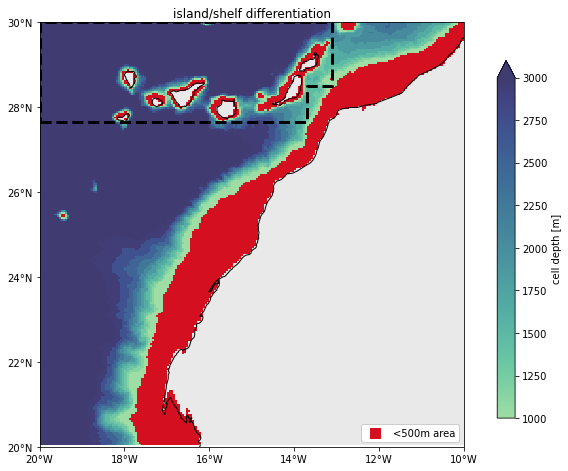

In [41]:
x_lines = np.arange(-20,-8,2).tolist()
y_lines = np.arange(20,32,2).tolist()


fig, ax1 = plt.subplots(1, 1, subplot_kw={"projection": proj}, figsize=(8, 8))


pcol = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.squeeze(), cmap = new_cmap, vmin = 1000,vmax = 3000)
#pcol1 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <1000)[0], cmap =color3, vmin = 500,vmax = 1000)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <500)[0], cmap =color2, vmin = 1,vmax = 500)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <10)[0], cmap ='binary', vmin = 0,vmax = 35)
#ax1.scatter(mesh_t_lon, mesh_t_lat, c = t_sel[0,layer_ind,:].where(t_sel[0,layer_ind,:] == 0),marker = 'X',s = 100)
ax1.coastlines()


#for legend
#ax1.scatter(0,0, s = 100, color = plt.cm.autumn(.7),marker = 's', label = '<1000m area')
ax1.scatter(0,0, s = 100, color = plt.cm.YlOrRd(.8),marker = 's', label = '<500m area')
#ax1.scatter(0,0, s = 100, c = '00',marker = 'X', label = 'Land grid-cell')
#rel_zone = patches.Rectangle((-16.3-box_size, 28.4-box_size), box_size*2,box_size*2,
#                            edgecolor = 'r',fill = None, linewidth = 2) 

#ax1.add_patch(rel_zone)
ax1.plot(box_canary.exterior.coords.xy[0],box_canary.exterior.coords.xy[1],ls = 'dashed', c = 'black',lw = 3)
#ax1.plot(box_poly.interiors[0].coords.xy[0],box_poly.interiors[0].coords.xy[1],ls = 'dashed',lw =3,c= '00', label = 'release Box, Land boundary')

cbar = plt.colorbar(pcol,extend = 'max', pad = cb_pad, fraction = cb_fraction*0.8)
cbar.set_label('cell depth [m]')

ax1.set_xticks(x_lines, crs=proj)
ax1.set_yticks(y_lines, crs=proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("island/shelf differentiation")
ax1.set_extent([-20, -10, 20, 30])

ax1.legend(loc = 'lower right',framealpha = 1)
plt.tight_layout()

#plt.savefig('pics/self_island.png', dpi = 300, bbox_inches = 'tight')

# 2nd generation release zone in 10° steps

## 10S - Gulf of Guinea

In [ ]:
## slice larger area (30N-10S)
lat_b = (-10,4.5)#slice in 10! steps
lon_b = (7,15)

yt_ind = np.where((t_lat <= lat_b[1]) & (t_lat>= lat_b[0]))[0]  
xt_ind = np.where((t_lon <= lon_b[1]) & (t_lon >= lon_b[0]))[0]
mesh_t_lon, mesh_t_lat = np.meshgrid(t_lon[xt_ind],t_lat[yt_ind])


t = xr.open_dataset(data_path / t_file)
t_sel = t.vosaline[:,:,yt_ind,xt_ind].sel( # 5 oberste schichten
    time_counter = "2011-01-01") # 1 month december

depth_ind = t_sel.where(t_sel == 0).fillna(1).sum(dim = "deptht").astype('int')
depth_tgrid =  t_sel.deptht.isel(deptht = depth_ind)
del t

depth_mask = depth_tgrid.where((depth_tgrid <500)&(depth_tgrid >10))[0]
#depth_mask.plot()
dm_4 = depth_mask
bath_saotome= dm_4.where((dm_4['nav_lat'] <=3.5)&(dm_4['nav_lon'] <=8.35)) #cut Sao Tome and Principe
dm_4 = dm_4.where((bath_saotome != dm_4))
dm_4.plot()

shifted shelf border at index 21
shifted shelf border at index 23
shifted shelf border at index 24
shifted shelf border at index 188
shifted shelf border at index 207
shifted shelf border at index 208
shifted shelf border at index 213
shifted shelf border at index 214
shifted shelf border at index 215
shifted shelf border at index 225
shifted shelf border at index 226
shifted shelf border at index 234
shifted shelf border at index 235
shifted shelf border at index 244
shifted shelf border at index 248
shifted shelf border at index 251
shifted shelf border at index 253
shifted shelf border at index 257
shifted shelf border at index 259
shifted shelf border at index 281
shifted shelf border at index 282
shifted shelf border at index 283
shifted shelf border at index 284


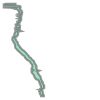

In [12]:
# take the 2 last indeices that have a NaN neoghbor at each latitude -> should be east and west boundary for cont. shelf

#iterate ofer lat 
east_border = []
west_border = []
    #
for i in range(depth_mask.shape[0]):
    
    lat_slice = depth_mask[i,:]

    nan_inds = ~np.isnan(lat_slice)

    neighbor_mask = np.zeros_like(depth_mask[0,:], dtype=bool)
    neighbor_mask[:-1] |= nan_inds[1:] & np.isnan(lat_slice[:-1]) # Check right neighbor
    neighbor_mask[1:] |= nan_inds[:-1] & np.isnan(lat_slice[1:]) # Check left neighbor

    latitude = depth_mask.nav_lat[i,0]
    
    if np.where(neighbor_mask)[0].size >=1:
        east_index = np.where(neighbor_mask)[0][-1] -2
        
        if np.where(neighbor_mask)[0].size >=2:#one gridcell farther away from land
            west_index = np.where(neighbor_mask)[0][-2]
        else:
            west_index = 0 #in case NaNs reach western end in gulf 
        
        if east_index-west_index < 6: #if shelf region is too thin: set west shelf 5 gridponts to left

            west_index = np.where(neighbor_mask)[0][-2] -4
            print(f'shifted shelf border at index {i}')

        east_border.append((depth_mask.nav_lon[i,east_index].values, latitude.values))#append index tuple
        west_border.append((depth_mask.nav_lon[i,west_index].values, latitude.values))
        

box_shelf = Polygon((east_border + list(reversed(west_border))))
box_shelf

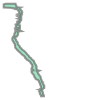

In [13]:
#manual

t_west = west_border
t_east = east_border
#t_east[283] = (7, depth_mask.nav_lat[283,0])
t_west[284] = (7, depth_mask.nav_lat[284,0].values)
t_west[283] = (7, depth_mask.nav_lat[283,0].values)
t_west[282] = (7, depth_mask.nav_lat[282,0].values)
t_west[281] = (7, depth_mask.nav_lat[281,0].values)
t_west[280] = (7, depth_mask.nav_lat[280,0].values)

#east
t_east[280] = (9, depth_mask.nav_lat[280,0].values)
t_east[281] = (9, depth_mask.nav_lat[281,0].values)
t_east[282] = (9, depth_mask.nav_lat[282,0].values)
t_east[283] = (9, depth_mask.nav_lat[283,0].values)
t_east[284] = (9, depth_mask.nav_lat[284,0].values)
t_east[285] = (9, depth_mask.nav_lat[285,0].values)
#t_east[284] = (9, depth_mask.nav_lat[284,0])

box_shelf = Polygon((t_west + list(reversed(t_east))))
box_shelf

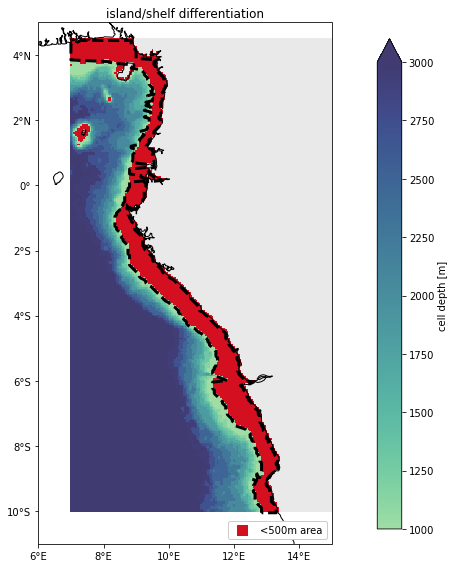

In [48]:
x_lines = np.arange(-20,15,2).tolist()
y_lines = np.arange(-10,32,2).tolist()

fig, ax1 = plt.subplots(1, 1, subplot_kw={"projection": proj}, figsize=(10, 8))

pcol = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.squeeze(), cmap = new_cmap, vmin = 1000,vmax = 3000)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <500)[0], cmap =color2, vmin = 1,vmax = 500)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <10)[0], cmap ='binary', vmin = 0,vmax = 35)

ax1.coastlines()

ax1.scatter(0,0, s = 100, color = plt.cm.YlOrRd(.8),marker = 's', label = '<500m area')
ax1.plot(box_shelf.exterior.coords.xy[0],box_shelf.exterior.coords.xy[1],ls = 'dashed', c = 'black',lw = 3)

cbar = plt.colorbar(pcol,extend = 'max', pad = cb_pad, fraction = cb_fraction*0.8)
cbar.set_label('cell depth [m]')

ax1.set_xticks(x_lines, crs=proj)
ax1.set_yticks(y_lines, crs=proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("island/shelf differentiation")
ax1.set_extent([6, 15, -11,5])

ax1.legend(loc = 'lower right',framealpha = 1)
plt.tight_layout()

In [14]:
box = pd.DataFrame(east_border + list(reversed(west_border)), columns = ['Lon', 'Lat'])
afr_shelf_south = box_shelf.area
#box.to_csv('../data/release_zone_shelf_7E_10S.csv', index=False)


## 10°N to 20*N

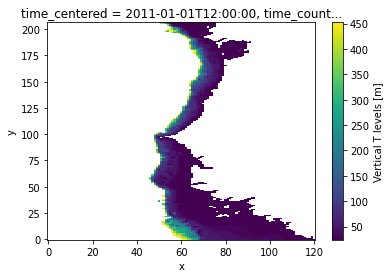

In [15]:
#slice larger area (30N-10S)
lat_b = (10,20)#slice in 10! steps
lon_b = (-20,-14)

yt_ind = np.where((t_lat <= lat_b[1]) & (t_lat>= lat_b[0]))[0]  
xt_ind = np.where((t_lon <= lon_b[1]) & (t_lon >= lon_b[0]))[0]
mesh_t_lon, mesh_t_lat = np.meshgrid(t_lon[xt_ind],t_lat[yt_ind])


t = xr.open_dataset(data_path / t_file)
t_sel = t.vosaline[:,:,yt_ind,xt_ind].sel( # 5 oberste schichten
    time_counter = "2011-01-01") # 1 month december

depth_ind = t_sel.where(t_sel == 0).fillna(1).sum(dim = "deptht").astype('int')
depth_tgrid =  t_sel.deptht.isel(deptht = depth_ind)
del t

depth_mask = depth_tgrid.where((depth_tgrid <500)&(depth_tgrid >10))[0]
depth_mask.plot()
dm_2 = depth_mask

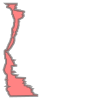

In [180]:
# take the 2 last indeices that have a NaN neoghbor at each latitude -> should be east and west boundary for cont. shelf

#iterate ofer lat 
east_border = []
west_border = []
    #
for i in range(depth_mask.shape[0]):
    
    lat_slice = depth_mask[i,:]

    nan_inds = ~np.isnan(lat_slice)

    neighbor_mask = np.zeros_like(depth_mask[0,:], dtype=bool)
    neighbor_mask[:-1] |= nan_inds[1:] & np.isnan(lat_slice[:-1]) # Check right neighbor
    neighbor_mask[1:] |= nan_inds[:-1] & np.isnan(lat_slice[1:]) # Check left neighbor

    latitude = depth_mask.nav_lat[i,0]
    
    if np.where(neighbor_mask)[0].size >=1:
        east_index = np.where(neighbor_mask)[0][-1]-3 
        west_index = np.where(neighbor_mask)[0][0]
        #if np.where(neighbor_mask)[0].size >=2:#one gridcell farther away from land
        #    west_index = np.where(neighbor_mask)[0][-2]
        #else:
        #    west_index = 0 #in case NaNs reach western end in gulf 
        
        #if east_index-west_index < 6: #if shelf region is too thin: set west shelf 5 gridponts to left

        #    west_index = np.where(neighbor_mask)[0][-2] -4
        #    print(f'shifted shelf border at index {i}')

        east_border.append((depth_mask.nav_lon[i,east_index].values, latitude.values))#append index tuple
        west_border.append((depth_mask.nav_lon[i,west_index].values, latitude.values))
        

box_shelf = Polygon((east_border + list(reversed(west_border))))
box_shelf

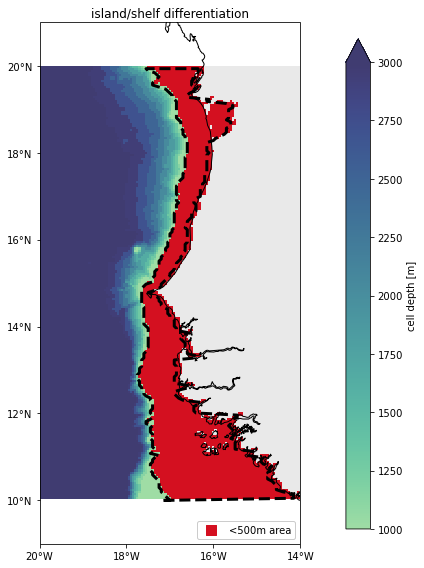

In [181]:
x_lines = np.arange(-20,15,2).tolist()
y_lines = np.arange(-10,32,2).tolist()

fig, ax1 = plt.subplots(1, 1, subplot_kw={"projection": proj}, figsize=(10, 8))

pcol = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.squeeze(), cmap = new_cmap, vmin = 1000,vmax = 3000)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <500)[0], cmap =color2, vmin = 1,vmax = 500)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <10)[0], cmap ='binary', vmin = 0,vmax = 35)

ax1.coastlines()
ax1.scatter(0,0, s = 100, color = plt.cm.YlOrRd(.8),marker = 's', label = '<500m area')
ax1.plot(box_shelf.exterior.coords.xy[0],box_shelf.exterior.coords.xy[1],ls = 'dashed', c = 'black',lw = 3)

cbar = plt.colorbar(pcol,extend = 'max', pad = cb_pad, fraction = cb_fraction*0.8)
cbar.set_label('cell depth [m]')

ax1.set_xticks(x_lines, crs=proj)
ax1.set_yticks(y_lines, crs=proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("island/shelf differentiation")
ax1.set_extent([-20, -14, 9,21])

ax1.legend(loc = 'lower right',framealpha = 1)
plt.tight_layout()

In [182]:
box = pd.DataFrame(east_border + list(reversed(west_border)), columns = ['Lon', 'Lat'])
box.to_csv('../data/release_zone_shelf_20N_10N.csv', index=False)


## 10°N to tenerife 

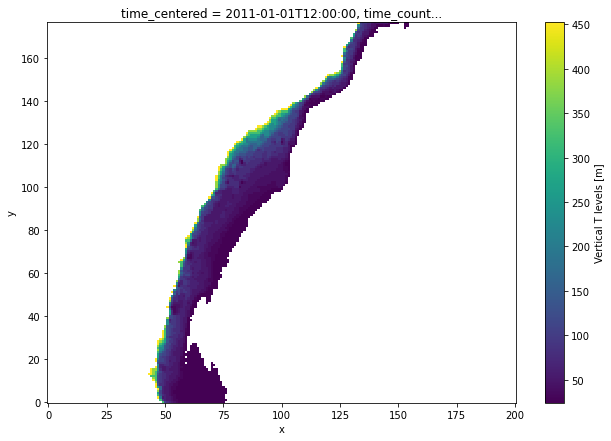

In [11]:
#slice larger area (30N-10S)
lat_b = (20,28)#slice in 10! steps
lon_b = (-20,-10)

yt_ind = np.where((t_lat <= lat_b[1]) & (t_lat>= lat_b[0]))[0]  
xt_ind = np.where((t_lon <= lon_b[1]) & (t_lon >= lon_b[0]))[0]
mesh_t_lon, mesh_t_lat = np.meshgrid(t_lon[xt_ind],t_lat[yt_ind])


t = xr.open_dataset(data_path / t_file)
t_sel = t.vosaline[:,:,yt_ind,xt_ind].sel( # 5 oberste schichten
    time_counter = "2011-01-01") # 1 month december

depth_ind = t_sel.where(t_sel == 0).fillna(1).sum(dim = "deptht").astype('int')
depth_tgrid =  t_sel.deptht.isel(deptht = depth_ind)
del t

depth_mask = depth_tgrid.where((depth_tgrid <500)&(depth_tgrid >10))[0]
#cut out CAnary and seamounts (from plot_full_weekly)
dm = depth_mask
bath_canary = dm.where((dm['nav_lat'] >=27.65)&(dm['nav_lon'] <=-14.45))
bath_canary2 = dm.where((dm['nav_lat'] >=28)&(dm['nav_lon'] <=-13.45))
bath_fuerte = dm.where((dm['nav_lat'] >=28.4)&(dm['nav_lon'] <=-13.2))#cut eastern side of fuerteventure, Lanzarote
bath_smount = dm.where((dm['nav_lat'] >=29.5)&(dm['nav_lon'] <=-11.9))#cut  conception seamount


depth_mask = dm.where((bath_canary != dm)&(bath_canary2 != dm)&(bath_fuerte != dm)&(bath_smount != dm)&(dm['nav_lon'] >=-18.5))
dm_1 = depth_mask
depth_mask.plot(size = 7)

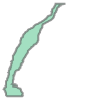

In [176]:
# take the 2 last indeices that have a NaN neoghbor at each latitude -> should be east and west boundary for cont. shelf



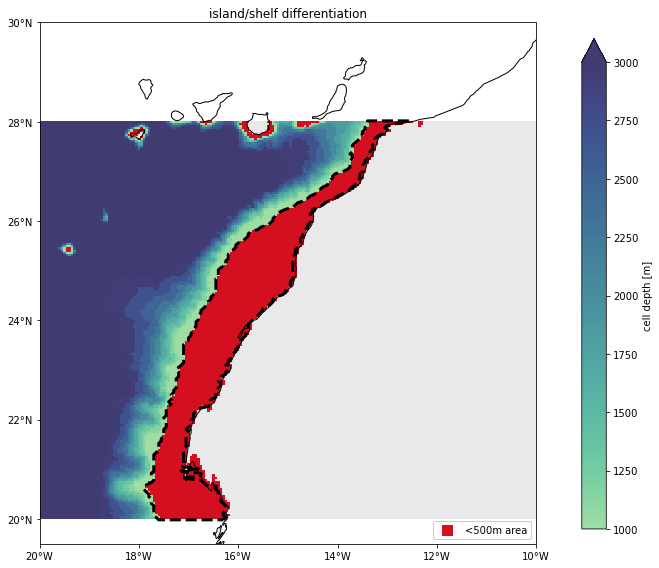

In [177]:
x_lines = np.arange(-20,15,2).tolist()
y_lines = np.arange(-10,32,2).tolist()

fig, ax1 = plt.subplots(1, 1, subplot_kw={"projection": proj}, figsize=(10, 8))

pcol = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.squeeze(), cmap = new_cmap, vmin = 1000,vmax = 3000)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <500)[0], cmap =color2, vmin = 1,vmax = 500)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <10)[0], cmap ='binary', vmin = 0,vmax = 35)

ax1.coastlines()
ax1.scatter(0,0, s = 100, color = plt.cm.YlOrRd(.8),marker = 's', label = '<500m area')
ax1.plot(box_shelf.exterior.coords.xy[0],box_shelf.exterior.coords.xy[1],ls = 'dashed', c = 'black',lw = 3)

cbar = plt.colorbar(pcol,extend = 'max', pad = cb_pad, fraction = cb_fraction*0.8)
cbar.set_label('cell depth [m]')

ax1.set_xticks(x_lines, crs=proj)
ax1.set_yticks(y_lines, crs=proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("island/shelf differentiation")
ax1.set_extent([-20, -10, 19.5,30])

ax1.legend(loc = 'lower right',framealpha = 1)
plt.tight_layout()

In [178]:
box = pd.DataFrame(east_border + list(reversed(west_border)), columns = ['Lon', 'Lat'])
box.to_csv('../data/release_zone_shelf_30N_20N.csv', index=False)


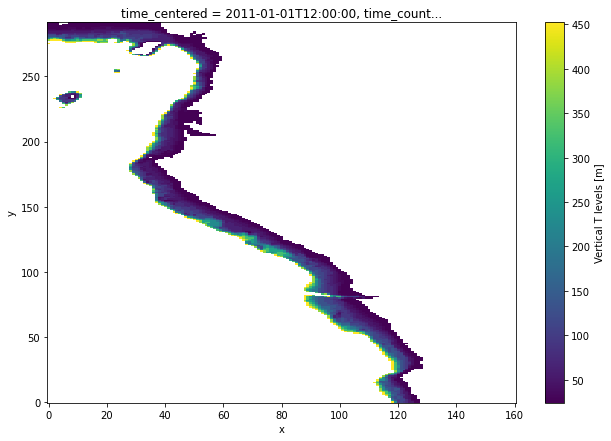

In [6]:
#cut out CAnary and seamounts (from plot_full_weekly)
dm = depth_mask
bath_canary = dm.where((dm['nav_lat'] >=27.65)&(dm['nav_lon'] <=-14.45))
bath_canary2 = dm.where((dm['nav_lat'] >=28)&(dm['nav_lon'] <=-13.45))
bath_fuerte = dm.where((dm['nav_lat'] >=28.4)&(dm['nav_lon'] <=-13.2))#cut eastern side of fuerteventure, Lanzarote
bath_smount = dm.where((dm['nav_lat'] >=29.5)&(dm['nav_lon'] <=-11.9))#cut  conception seamount


depth_mask = dm.where((bath_canary != dm)&(bath_canary2 != dm)&(bath_fuerte != dm)&(bath_smount != dm)&(dm['nav_lon'] >=-18.5))
dm_1 = depth_mask
depth_mask.plot(size = 7)

## Gulf of guinea

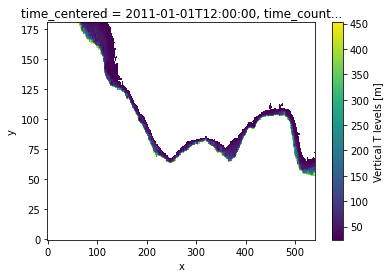

In [18]:
#equator
#slice larger area (30N-10S)
lat_b = (1,10)#slice in 10! steps
lon_b = (-20,7)

yt_ind = np.where((t_lat <= lat_b[1]) & (t_lat>= lat_b[0]))[0]  
xt_ind = np.where((t_lon <= lon_b[1]) & (t_lon >= lon_b[0]))[0]
mesh_t_lon, mesh_t_lat = np.meshgrid(t_lon[xt_ind],t_lat[yt_ind])


t = xr.open_dataset(data_path / t_file)
t_sel = t.vosaline[:,:,yt_ind,xt_ind].sel( # 5 oberste schichten
    time_counter = "2011-01-01") # 1 month december

depth_ind = t_sel.where(t_sel == 0).fillna(1).sum(dim = "deptht").astype('int')
depth_tgrid =  t_sel.deptht.isel(deptht = depth_ind)
del t

depth_mask = depth_tgrid.where((depth_tgrid <500)&(depth_tgrid >10))[0]
depth_mask.plot()
dm_3 = depth_mask

In [102]:
#iterate ofer lat 
north_border = []
south_border = []
    #
for i in range(depth_mask.shape[1]): #slice meridionally 
    
    lon_slice = depth_mask[:,i]

    nan_inds = ~np.isnan(lon_slice)

    neighbor_mask = np.zeros_like(depth_mask[:,0], dtype=bool)
    neighbor_mask[:-1] |= nan_inds[1:] & np.isnan(lon_slice[:-1]) # Check right neighbor
    neighbor_mask[1:] |= nan_inds[:-1] & np.isnan(lon_slice[1:]) # Check left neighbor

    longitude = depth_mask.nav_lon[0,i]
    
    if np.where(neighbor_mask)[0].size >=1:
        south_index = np.where(neighbor_mask)[0][0]
          #one gridcell farther away from land
        
        if np.where(neighbor_mask)[0].size >=2:
            
            north_index = np.where(neighbor_mask)[0][1] -2

            #if north_index-south_index < 6: #if shelf region is too thin: set west shelf 5 gridponts to left

            #print(f'shifted shelf border at index {i}')
            north_border.append((longitude.values, depth_mask.nav_lat[north_index,i].values))#append index tuple
        
        south_border.append((longitude.values, depth_mask.nav_lat[south_index,i].values))


box_shelf = Polygon((south_border + list(reversed(north_border))))


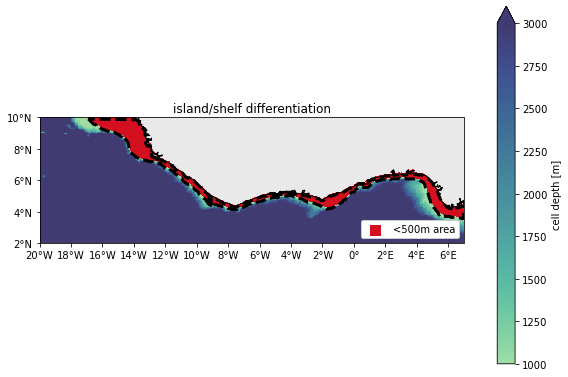

In [104]:
x_lines = np.arange(-20,15,2).tolist()
y_lines = np.arange(-10,32,2).tolist()

fig, ax1 = plt.subplots(1, 1, subplot_kw={"projection": proj}, figsize=(8, 8))


pcol = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.squeeze(), cmap = new_cmap, vmin = 1000,vmax = 3000)
#pcol1 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <1000)[0], cmap =color3, vmin = 500,vmax = 1000)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <500)[0], cmap =color2, vmin = 1,vmax = 500)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <10)[0], cmap ='binary', vmin = 0,vmax = 35)
#ax1.scatter(mesh_t_lon, mesh_t_lat, c = t_sel[0,layer_ind,:].where(t_sel[0,layer_ind,:] == 0),marker = 'X',s = 100)
ax1.coastlines()


#for legend
#ax1.scatter(0,0, s = 100, color = plt.cm.autumn(.7),marker = 's', label = '<1000m area')
ax1.scatter(0,0, s = 100, color = plt.cm.YlOrRd(.8),marker = 's', label = '<500m area')
#ax1.scatter(0,0, s = 100, c = '00',marker = 'X', label = 'Land grid-cell')
#rel_zone = patches.Rectangle((-16.3-box_size, 28.4-box_size), box_size*2,box_size*2,
#                            edgecolor = 'r',fill = None, linewidth = 2) 

#ax1.add_patch(rel_zone)
ax1.plot(box_shelf.exterior.coords.xy[0],box_shelf.exterior.coords.xy[1],ls = 'dashed', c = 'black',lw = 3)
#ax1.plot(box_poly.interiors[0].coords.xy[0],box_poly.interiors[0].coords.xy[1],ls = 'dashed',lw =3,c= '00', label = 'release Box, Land boundary')

cbar = plt.colorbar(pcol,extend = 'max', pad = cb_pad, fraction = cb_fraction*0.8)
cbar.set_label('cell depth [m]')

ax1.set_xticks(x_lines, crs=proj)
ax1.set_yticks(y_lines, crs=proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("island/shelf differentiation")
ax1.set_extent([-20, 7, 2, 10])
#ax1.set_extent([-19, -16, 20,23])

ax1.legend(loc = 'lower right',framealpha = 1)
plt.tight_layout()

In [105]:
box = pd.DataFrame(south_border + list(reversed(north_border)), columns = ['Lon', 'Lat'])
box.to_csv('../data/release_zone_shelf_10N_7E.csv', index=False)

## New extended zone 1 for statistics


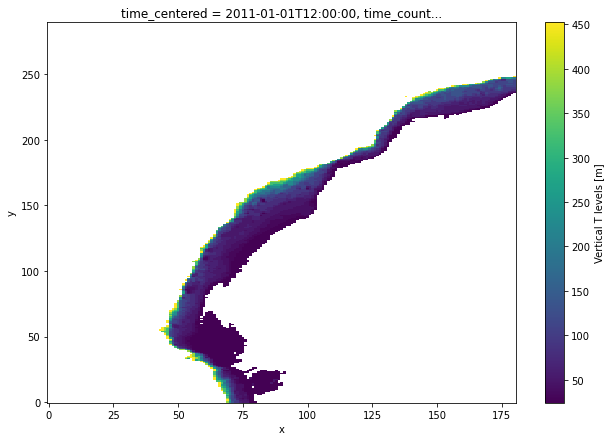

In [26]:
#extend northwards and southwards
lat_b = (18,31)#slice in 10! steps
lon_b = (-20,-11)

yt_ind = np.where((t_lat <= lat_b[1]) & (t_lat>= lat_b[0]))[0]  
xt_ind = np.where((t_lon <= lon_b[1]) & (t_lon >= lon_b[0]))[0]
mesh_t_lon, mesh_t_lat = np.meshgrid(t_lon[xt_ind],t_lat[yt_ind])


t = xr.open_dataset(data_path / t_file)
t_sel = t.vosaline[:,:,yt_ind,xt_ind].sel( # 5 oberste schichten
    time_counter = "2011-01-01") # 1 month december

depth_ind = t_sel.where(t_sel == 0).fillna(1).sum(dim = "deptht").astype('int')
depth_tgrid =  t_sel.deptht.isel(deptht = depth_ind)
del t

depth_mask = depth_tgrid.where((depth_tgrid <=500)&(depth_tgrid >10))[0]
#cut out CAnary and seamounts (from plot_full_weekly)
dm = depth_mask
bath_canary = dm.where((dm['nav_lat'] >=27.65)&(dm['nav_lon'] <=-14.45))
bath_canary2 = dm.where((dm['nav_lat'] >=28)&(dm['nav_lon'] <=-13.45))
bath_fuerte = dm.where((dm['nav_lat'] >=28.4)&(dm['nav_lon'] <=-13.2))#cut eastern side of fuerteventure, Lanzarote
bath_smount = dm.where((dm['nav_lat'] >=29.5)&(dm['nav_lon'] <=-11.9))#cut  conception seamount


depth_mask = dm.where((bath_canary != dm)&(bath_canary2 != dm)&(bath_fuerte != dm)&(bath_smount != dm)&(dm['nav_lon'] >=-18.5))
dm_1 = depth_mask
depth_mask.plot(size = 7)

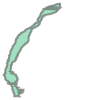

In [44]:
#iterate ofer lat 
east_border = []
west_border = []
    #
for i in range(depth_mask.shape[0]):
    
    lat_slice = depth_mask[i,:]

    nan_inds = ~np.isnan(lat_slice)

    neighbor_mask = np.zeros_like(depth_mask[0,:], dtype=bool)
    neighbor_mask[:-1] |= nan_inds[1:] & np.isnan(lat_slice[:-1]) # Check right neighbor
    neighbor_mask[1:] |= nan_inds[:-1] & np.isnan(lat_slice[1:]) # Check left neighbor

    latitude = depth_mask.nav_lat[i,0]
    if np.where(neighbor_mask)[0].size ==1:
        west_index = np.where(neighbor_mask)[0][0]
        east_index = -1
        east_border.append((depth_mask.nav_lon[i,east_index].values, latitude.values))#append index tuple
        west_border.append((depth_mask.nav_lon[i,west_index].values, latitude.values))

    if np.where(neighbor_mask)[0].size >=2:
        
        
        east_index = np.where(neighbor_mask)[0][1] -1
        west_index = np.where(neighbor_mask)[0][0]
        east_border.append((depth_mask.nav_lon[i,east_index].values, latitude.values))#append index tuple
        west_border.append((depth_mask.nav_lon[i,west_index].values, latitude.values))
        
box_shelf = Polygon((east_border + list(reversed(west_border))))

#fix outliers
t_west = west_border
t_east = east_border

t_east[-12] = (-11.1, 28.67)
t_east[-16] = (-11.15, 28.67)
np.array(t_east[-30:])
box_shelf = Polygon((t_west + list(reversed(t_east))))


box_shelf

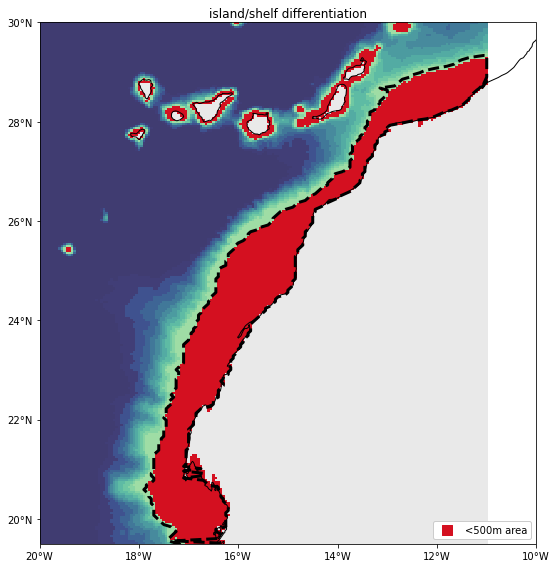

In [49]:
x_lines = np.arange(-20,15,2).tolist()
y_lines = np.arange(-10,32,2).tolist()
proj = cartopy.crs.PlateCarree()

fig, ax1 = plt.subplots(1, 1, subplot_kw={"projection": proj}, figsize=(10, 8))

pcol = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.squeeze(), cmap = new_cmap, vmin = 1000,vmax = 3000)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <500)[0], cmap =color2, vmin = 1,vmax = 500)
pcol2 = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.where(depth_tgrid <10)[0], cmap ='binary', vmin = 0,vmax = 35)

ax1.coastlines()
ax1.scatter(0,0, s = 100, color = plt.cm.YlOrRd(.8),marker = 's', label = '<500m area')
ax1.plot(box_shelf.exterior.coords.xy[0],box_shelf.exterior.coords.xy[1],ls = 'dashed', c = 'black',lw = 3)

#cbar = plt.colorbar(pcol,extend = 'max', pad = cb_pad, fraction = cb_fraction*0.8)
#cbar.set_label('cell depth [m]')

ax1.set_xticks(x_lines, crs=proj)
ax1.set_yticks(y_lines, crs=proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("island/shelf differentiation")
ax1.set_extent([-20, -10, 19.5,30])

ax1.legend(loc = 'lower right',framealpha = 1)
plt.tight_layout()

In [50]:
box = pd.DataFrame(t_west + list(reversed(t_east)), columns = ['Lon', 'Lat'])
box.to_csv('../data/release_zone_1ext.csv', index=False)

# Area calculations 


In [19]:
import math


def latlon_to_cart(lat, lon):
    R = 6371  # radius Earth
    x = R * math.cos(math.radians(lat)) * math.cos(math.radians(lon))
    y = R * math.cos(math.radians(lat)) * math.sin(math.radians(lon))
    return x, y

def calculate_scaled_area(polygon):
    # convert polygon
    cart_coord = [latlon_to_cart(lat, lon) for lat, lon in polygon.exterior.coords[:]]

    # calc Cartesian space
    scaled_polygon = Polygon(cart_coord)
    scaled_area = scaled_polygon.area

    # scale the area back to geographic units
    scale_factor = (math.pi / 180) ** 2
    scaled_area *= scale_factor #* (6371 ** 2)

    return scaled_area

In [20]:
#load from csv data
shelf_4 = Polygon(pd.read_csv(Path("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/release_zone_shelf_7E_10S.csv")).values.tolist(), [])
area_4 = calculate_scaled_area(shelf_4)
print(f'from 7°E to 10°S shelf area: {calculate_scaled_area(shelf_4)} square degrees')

from 7°E to 10°S shelf area: 6.335653572313151 square degrees


In [21]:
shelf_3 = Polygon(pd.read_csv(Path("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/release_zone_shelf_10N_7E.csv")).values.tolist(), [])
area_3 = calculate_scaled_area(shelf_3)
print(f'from 10°N to 7° shelf area: {calculate_scaled_area(shelf_3)} square degrees')

from 10°N to 7° shelf area: 4.8304140783450205 square degrees


In [22]:
shelf_2 = Polygon(pd.read_csv(Path("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/release_zone_shelf_20N_10N.csv")).values.tolist(), [])
area_2 = calculate_scaled_area(shelf_2)
print(f'from 20°N to 10°N shelf area: {calculate_scaled_area(shelf_2)} square degrees')

from 20°N to 10°N shelf area: 10.016741759409589 square degrees


In [23]:
shelf_1 = Polygon(pd.read_csv(Path("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/release_zone_shelf_30N_20N.csv")).values.tolist(), [])
area_1 = calculate_scaled_area(shelf_1)
print(f'from 30°N to 20°N shelf area: {calculate_scaled_area(shelf_1)} square degrees')

from 30°N to 20°N shelf area: 7.155907613314078 square degrees


In [24]:
area_sum = area_1 +area_2 +area_3+ area_4
p_num = 50000

print(f'factor area1: {area_1/area_sum }')

print(f'factor area2: {area_2/area_sum }')
print(f'factor area3: {area_3/area_sum }')
print(f'factor area4: {area_4/area_sum }')

factor area1: 0.25251346443841644
factor area2: 0.3534648993158345
factor area3: 0.17045281458435538
factor area4: 0.2235688216613935


In [58]:
depth_mask

<xarray.DataArray 'deptht' (y: 177, x: 201)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    deptht         (y, x) float64 3.651e+03 3.651e+03 3.651e+03 ... 3.047 3.047
    nav_lat        (y, x) float32 19.98 19.98 19.98 19.98 ... 28.01 28.01 28.01
    nav_lon        (y, x) float32 -20.0 -19.95 -19.9 ... -10.1 -10.05 -9.997
    time_centered  datetime64[ns] 2011-01-01T12:00:00
    time_counter   datetime64[ns] 2011-01-01T12:00:00
Dimensions without coordinates: y, x
Attributes:
    name:       deptht
    long_name:  Vertical T levels
    units:      m
    positive:   down
    bounds:     deptht_bounds

In [33]:
def plot_region(depth_mask):
    
    mask = xr.where(depth_mask >1, 1 , 0)
    
    mask[:,0] = 0 #set borders to 0 to get continous countour 
    mask[:,-1] = 0
    mask[0,:] = 0
    mask[-1,:] = 0
    depth_mask.plot.pcolormesh(x = 'nav_lon', y = 'nav_lat',cmap = cmap_list[i], add_colorbar = False,ax = ax1, zorder = 1, rasterized  = True)
    cs = ax1.contour(mask['nav_lon'], mask['nav_lat'], mask.squeeze(), colors = "00", linewidths = 1,antialiased = True, levels = [1],zorder= 1)
    for c in cs.collections:
        c.set_rasterized(True)
    ax1.scatter(0,0, s = 100, color = c_list[i],marker = 's', label = region_list[i], zorder = -3, rasterized = True, transform = proj)

#create monochrome cmaps
from matplotlib.colors import ListedColormap
import cartopy.feature as cf

cmap_list = [ListedColormap(['tab:blue']),
             ListedColormap(['tab:orange']),
             ListedColormap(['tab:green']),
             ListedColormap(['tab:purple'])]
c_list = ['tab:blue','tab:orange','tab:green','tab:purple']

/opt/conda/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


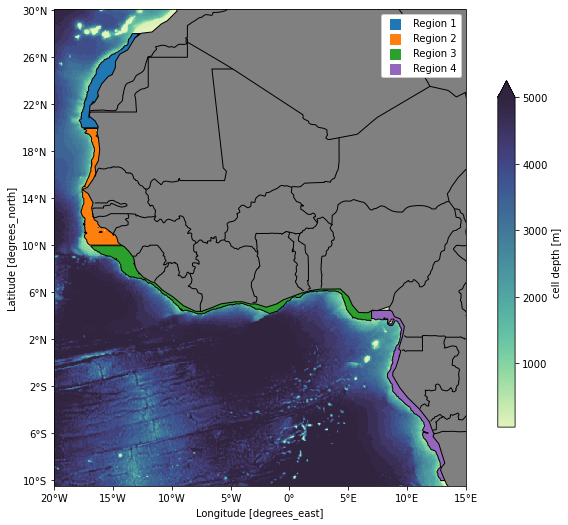

In [38]:
# plot all release zones
proj = cartopy.crs.PlateCarree()
lat_b = (-11,31)#slice in 10! steps
lon_b = (-21,16)
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale='110m', edgecolor='k', facecolor=cartopy.feature.COLORS['land'])

mask_list = [dm_1,dm_2,dm_3,dm_4]
region_list = ['Region 1','Region 2','Region 3','Region 4']


yt_ind = np.where((t_lat <= lat_b[1]) & (t_lat>= lat_b[0]))[0]  
xt_ind = np.where((t_lon <= lon_b[1]) & (t_lon >= lon_b[0]))[0]
mesh_t_lon, mesh_t_lat = np.meshgrid(t_lon[xt_ind],t_lat[yt_ind])


t = xr.open_dataset(data_path / t_file)
t_sel = t.vosaline[:,:,yt_ind,xt_ind].sel( # 5 oberste schichten
    time_counter = "2011-01-01") # 1 month december

depth_ind = t_sel.where(t_sel == 0).fillna(1).sum(dim = "deptht").astype('int')
depth_tgrid =  t_sel.deptht.isel(deptht = depth_ind)
del t

x_lines = np.arange(-20,20,5).tolist()
y_lines = np.arange(-10,32,4).tolist()

fig, ax1 = plt.subplots(1, 1, subplot_kw={"projection": proj}, figsize=(8, 9))

#bathymetry
pcol = ax1.pcolormesh(mesh_t_lon, mesh_t_lat,depth_tgrid.squeeze(), 
                      cmap = cmocean.tools.crop_by_percent(cmocean.cm.deep, 10, which='both', N=None), vmin = 35,vmax = 5000, rasterized = True)

#regions
for i,mask in enumerate(mask_list):
    plot_region(mask)


ax1.add_feature(land,facecolor='gray',zorder = 2, rasterized = True)
ax1.add_feature(cf.BORDERS, zorder = 2, rasterized = True)
cbar = plt.colorbar(pcol,extend = 'max', pad = cb_pad, fraction = cb_fraction*0.8)
cbar.set_label('cell depth [m]')

ax1.set_xticks(x_lines, crs=proj)
ax1.set_yticks(y_lines, crs=proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("")
ax1.set_extent([-20, 15, -10.5, 29.])

ax1.legend(loc = 'upper right',framealpha = 1)
plt.tight_layout()
plt.savefig('pics/map_shelf_zones_5kbathymetry.svg', format = 'svg', dpi = 700) 
#plt.savefig('pics/shelf_relesezone.png', dpi = 300, bbox_inches = 'tight')

In [41]:
#save depthmasks
dm_1.to_netcdf((Path("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/shelf_zone1.nc")))
dm_2.to_netcdf((Path("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/shelf_zone2.nc")))
dm_3.to_netcdf((Path("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/shelf_zone3.nc")))
dm_4.to_netcdf((Path("/gxfs_work1/geomar/smomw529/2023_sea_urchin_tenerife/data/shelf_zone4.nc")))